### The aim of this EDA is to analyze the distribution, relationships, and patterns in the dataset to better understand real estate trends, pricing, and factors affecting property values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("sales_hyd.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8947 entries, 0 to 8946
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BHK            8947 non-null   float64
 1   Locality       8947 non-null   object 
 2   Area           8947 non-null   object 
 3   Price          8947 non-null   float64
 4   Transaction    8947 non-null   object 
 5   Floor          8947 non-null   object 
 6   Carpet_area    8947 non-null   float64
 7   Price_per_sft  8947 non-null   float64
 8   Furnishing     8947 non-null   object 
 9   Status         8947 non-null   object 
 10  Region         8947 non-null   object 
dtypes: float64(4), object(7)
memory usage: 769.0+ KB


In [4]:
df.shape

(8947, 11)

In [5]:
d = pd.read_csv("rent_hyd.csv")

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BHK               4321 non-null   int64 
 1   Locality          4321 non-null   object
 2   Area              4321 non-null   object
 3   Price             4321 non-null   int64 
 4   Floor             4321 non-null   object
 5   Carpet_area       4321 non-null   object
 6   Furnishing        4321 non-null   object
 7   No_of_bathrooms   4321 non-null   object
 8   Tenant_Preferred  4321 non-null   object
 9   Availability      4321 non-null   object
 10  Region            4321 non-null   object
dtypes: int64(2), object(9)
memory usage: 371.5+ KB


In [10]:
df.sort_values(by='Price',ascending=False).head(10)

,BHK,Locality,Area,Price,Transaction,Floor,Carpet_area,Price_per_sft,Furnishing,Status,Region
2949,10.0,Jubilee Hills,Jubilee hills,14.0,New Property,3.0,8600.0,7000.0,Semi-Furnished,Ready to Move,west
874,4.0,Gachibowli,Financial district,14.0,Resale,19.0,4999.5,21002.0,Unfurnished,Ready to Move,west
2819,5.0,Banjara Hills,Jubilee hills,13.5,Resale,3.0,6502.5,15571.0,Semi-Furnished,Ready to Move,west
1065,5.0,Gachibowli,Financial district,13.0,Resale,15.0,4875.0,20000.0,Furnished,Ready to Move,west
2917,5.0,Jubilee Hills,Jubilee hills,12.6,New Property,4.0,10100.0,12000.0,Semi-Furnished,Under Construction,west
2891,5.0,Jubilee Hills,Jubilee hills,12.6,New Property,6.0,8500.0,12000.0,Unfurnished,Under Construction,west
1140,4.0,Gachibowli,Financial district,12.5,Resale,11.0,6660.0,18752.0,Unfurnished,Ready to Move,west
2683,5.0,Jubilee Hills,Jubilee hills,12.0,New Property,6.0,5300.0,14966.0,Unfurnished,Under Construction,west
1349,4.0,Gachibowli,Financial district,12.0,Resale,10.0,4999.5,18002.0,Unfurnished,Ready to Move,west
1143,4.0,Gachibowli,Financial district,12.0,Resale,11.0,4999.5,18002.0,Unfurnished,Ready to Move,west


In [109]:
d['Tenant_Preferred'].value_counts()

Tenant_Preferred
Bachelors/Family    2145
Bachelors           1599
Family               517
Not Mentioned         56
Name: count, dtype: int64

## Apartment Price and Rent Distribution

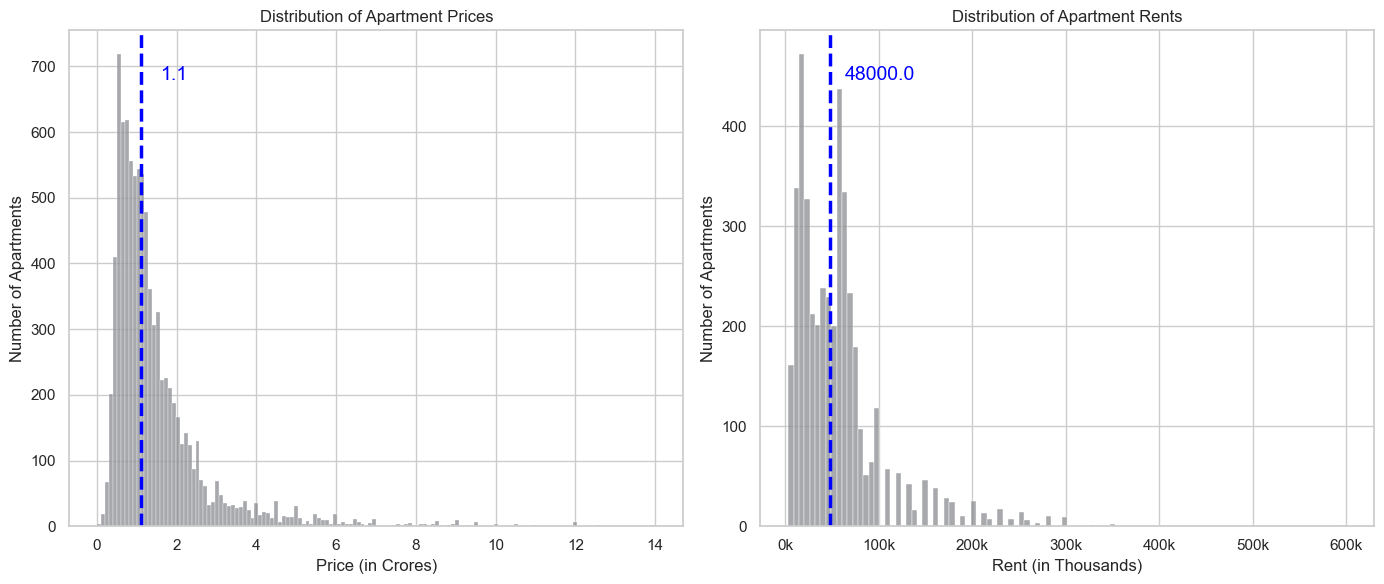

In [12]:
from matplotlib.ticker import FuncFormatter

# Function to format x-axis values in thousands
thousands = lambda x, _: f'{x * 1e-3:.0f}k'

# Plot histogram with median line and text
def plot_hist(data, ax, title, xlabel, median, offset, format_x=False):
    sns.histplot(data, color='#8A8D90', ax=ax)
    ax.axvline(median, color='blue', linestyle='--', linewidth=2.5)
    ax.text(median + offset, ax.get_ylim()[1] * 0.9, f'{median}', color='blue', fontsize=14)
    ax.set(title=title, xlabel=xlabel, ylabel='Number of Apartments')
    if format_x: ax.xaxis.set_major_formatter(FuncFormatter(thousands))

# Set up plot and style
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# Plot Price Distribution
plot_hist(df['Price'], plt.subplot(1, 2, 1), 'Distribution of Apartment Prices', 
          'Price (in Crores)', df['Price'].median(), 0.5)

# Plot Rent Distribution
plot_hist(d['Price'], plt.subplot(1, 2, 2), 'Distribution of Apartment Rents', 
          'Rent (in Thousands)', d['Price'].median(), 15000, format_x=True)

plt.tight_layout()
plt.savefig('hist.png')
plt.show()

In [13]:
Q1 = df['Price'].quantile(0.25)  # 25th percentile
Q3 = df['Price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1 
Q1,Q3,IQR

(np.float64(0.723), np.float64(1.75), np.float64(1.0270000000000001))

In [14]:
Q1 = d['Price'].quantile(0.25)  # 25th percentile
Q3 = d['Price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1 
Q1,Q3,IQR

(np.float64(23000.0), np.float64(70000.0), np.float64(47000.0))

* Both the price and rent distributions are heavily right-skewed, meaning most apartments have prices and rents at the lower end of the scale, while a few apartments are priced or rented significantly higher.
* The skewness suggests that while affordable apartments are abundant, there is a smaller market segment for premium-priced apartments.
* Most apartments are priced between 75 Lakhs to 1.75 Crores, which accounts for the highest frequency in the histogram
* The median price is approximately 1.1 Crores, indicated by the dashed blue line. This means that 50% of the apartments in the dataset are priced below this value.

* Most apartments have a rent clustering between 20,000 and 70,000 INR. 
* The median rent is 48,000 INR per month, suggesting that half the apartments are rented for less than this amount.
* The distribution of both rent and price suggests a clear market segmentation. There is a substantial supply of relatively affordable apartments, while a much smaller market exists for higher-end properties.

In [15]:
df['BHK']=df['BHK'].astype('int')

In [16]:
d = d[d['BHK']!=0]

#### 

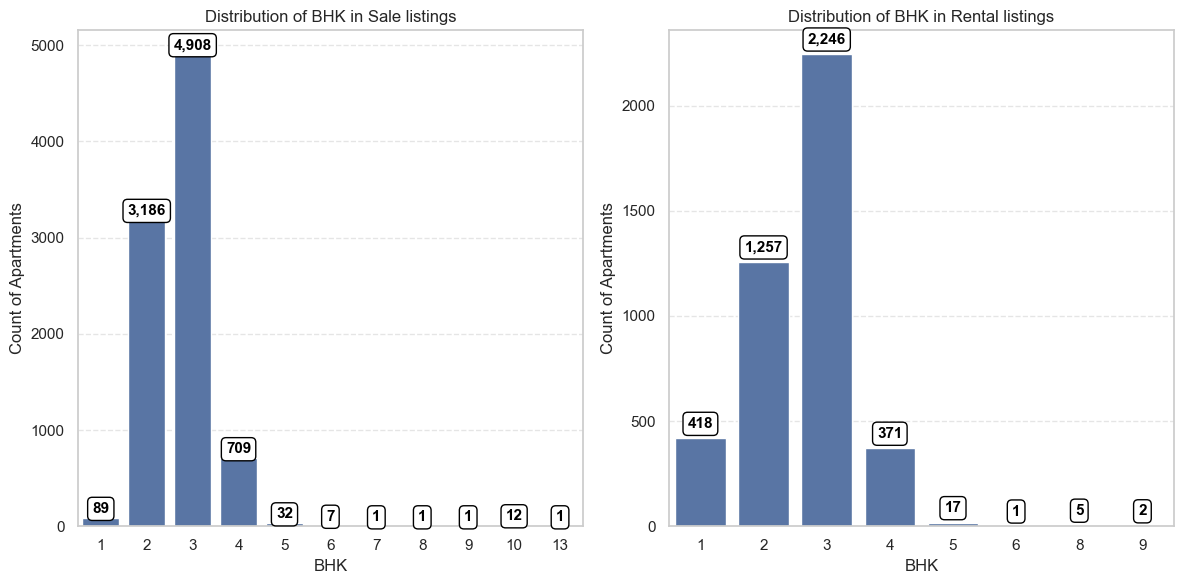

In [18]:
sns.set(style="whitegrid")

def plot_bhk_distribution(ax, data, title):
    sns.countplot(x='BHK', data=data, ax=ax)
    ax.set(title=title, xlabel='BHK', ylabel='Count of Apartments')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 50, f'{int(p.get_height()):,}',
                ha="center", fontsize=11, color='black', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Sale and Rental distributions
plot_bhk_distribution(axs[0], df, 'Distribution of BHK in Sale listings')
plot_bhk_distribution(axs[1], d, 'Distribution of BHK in Rental listings')

plt.tight_layout()
plt.savefig('BHK.png')
plt.show()


**Approximately 90% of sale listings and 80% of rental listings consist of 2 and 3 BHK units.**

C:\Users\MOHITH\AppData\Local\Temp\ipykernel_22240\2701288782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['BHK'].isin([2, 3])], x='BHK', y='Price', palette='muted', width=0.5)


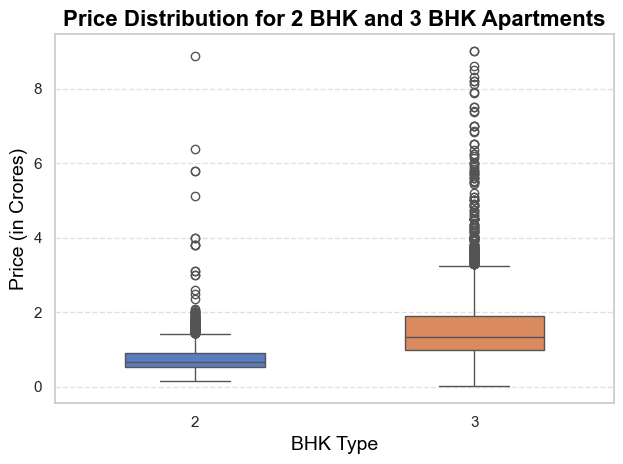

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a neutral dark theme but ensure clear contrast with black font
sns.set(style="whitegrid")

# Create the boxplot with a darker palette
sns.boxplot(data=df[df['BHK'].isin([2, 3])], x='BHK', y='Price', palette='muted', width=0.5)

# Customize the title, labels, and fonts with black color for high contrast
plt.title('Price Distribution for 2 BHK and 3 BHK Apartments', fontsize=16, weight='bold', color='black')
plt.xlabel('BHK Type', fontsize=14, color='black')
plt.ylabel('Price (in Crores)', fontsize=14, color='black')

# Add a subtle grid for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('box.png')
plt.show()


C:\Users\MOHITH\AppData\Local\Temp\ipykernel_22492\184225727.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d[d['BHK'].isin([2, 3])], x='BHK', y='Price', palette='muted', width=0.5)


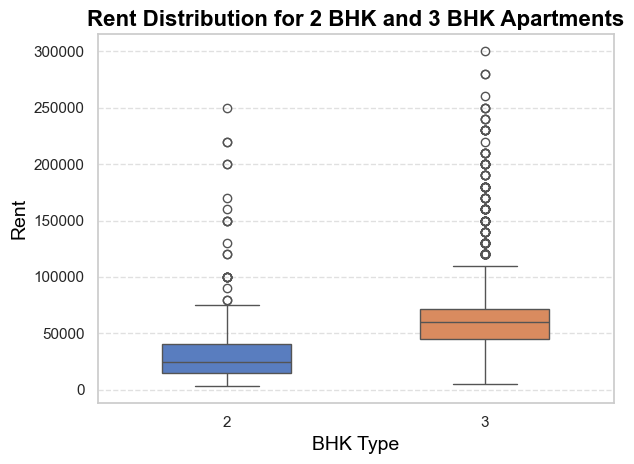

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a neutral dark theme but ensure clear contrast with black font
sns.set(style="whitegrid")

# Create the boxplot with a darker palette
sns.boxplot(data=d[d['BHK'].isin([2, 3])], x='BHK', y='Price', palette='muted', width=0.5)

# Customize the title, labels, and fonts with black color for high contrast
plt.title('Rent Distribution for 2 BHK and 3 BHK Apartments', fontsize=16, weight='bold', color='black')
plt.xlabel('BHK Type', fontsize=14, color='black')
plt.ylabel('Rent', fontsize=14, color='black')

# Add a subtle grid for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('rbox.png')
plt.show()


* The median price for 2 BHK apartments is significantly lower than that of 3 BHK apartments. This indicates that 3 BHK apartments are typically more expensive.
* The interquartile range (IQR) for 2 BHK apartments is much smaller, indicating less variability in prices compared to 3 BHK apartments, where prices are more spread out.
* Both 2 BHK and 3 BHK categories show several outliers, particularly on the higher end.
* The presence of extreme prices (outliers) are evident, as the price is influenced by various factors including "Locality", "built up area" and the Transaction of the property (New or Resale).

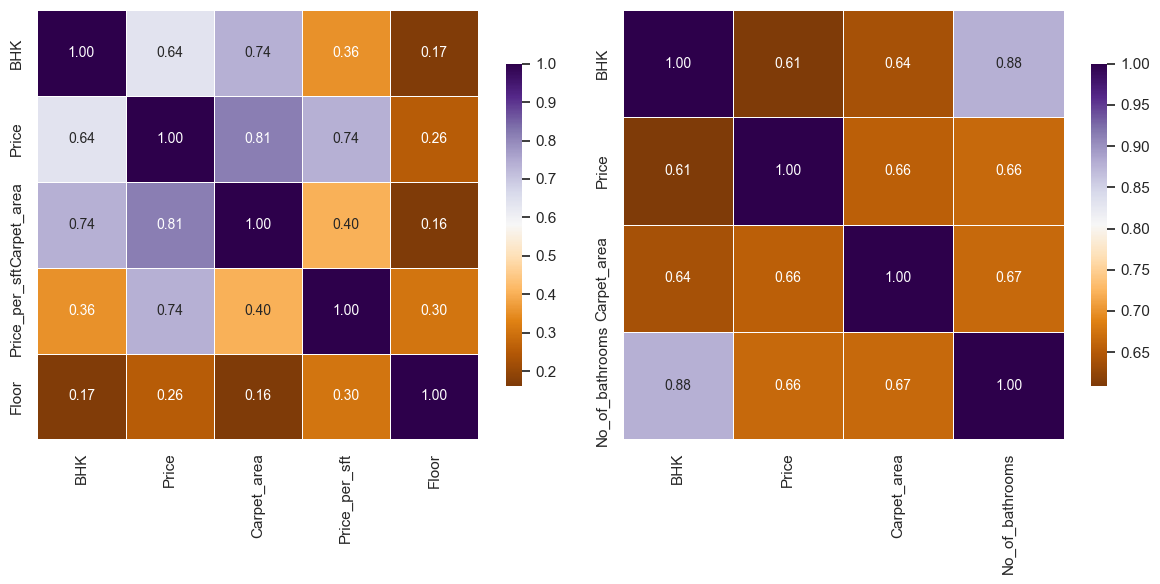

In [17]:

plt.figure(figsize=(12, 6))

# First heatmap (sub-plot 1)
plt.subplot(1, 2, 1)
df_cleaned = df[(df['Floor'] != 'Not Mentioned')]
sns.heatmap(df_cleaned[['BHK', 'Price', 'Carpet_area', 'Price_per_sft', 'Floor']].corr(),
            cmap='PuOr',  # Pleasant color gradient
            fmt='.2f',
            linewidths=0.5,  # Thin gridlines for smooth appearance
            annot=True,
            annot_kws={"size": 10},  # Control font size
            cbar_kws={"shrink": 0.75})  # Smaller color bar

# Second heatmap (sub-plot 2)
plt.subplot(1, 2, 2)
d_cleaned = d[(d['Carpet_area'] != 'Not Mentioned') & (d['No_of_bathrooms'] != 'Not Mentioned') & (d['Floor'] != 'Not Mentioned')]
sns.heatmap(d_cleaned[['BHK', 'Price', 'Carpet_area', 'No_of_bathrooms']].corr(),
            cmap='PuOr',  # Same colormap for consistency
            fmt='.2f',
            linewidths=0.5,  # Thin gridlines for smoother appearance
            annot=True,
            annot_kws={"size": 10},  # Control font size
            cbar_kws={"shrink": 0.75})  # Smaller color bar

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('heat.png')
plt.show()


* Both heatmaps show a strong positive correlation between Price and Carpet Area. This is expected since larger carpet areas typically result in higher property prices.
* In both heatmaps, BHK and Price are moderately correlated, indicating that more BHKs tend to increase the price but not as strongly as carpet area does.
* In the first heatmap, Price_per_sft shows a strong correlation with overall price but is not strongly linked to BHK or Carpet Area, suggesting that prices per square foot are influenced by factors like location or amenities.
* These correlations highlight the key factors affecting real estate pricing, with Carpet Area being the most significant, followed by BHK count and Price per square foot.

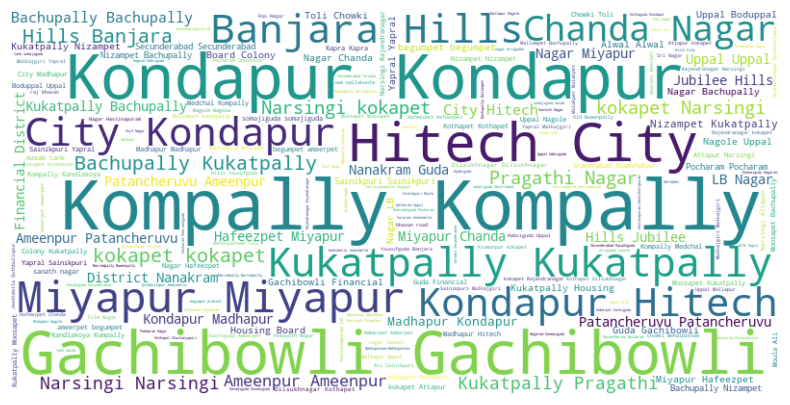

In [19]:
from wordcloud import WordCloud

# Convert 'Locality' column to a single string
text = ' '.join(df['Locality'].astype(str))

# Create and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color='black', contour_width=3).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word.png')
plt.show()

#### The dataset consists of listings of 162 Localities of Hyderabad.

In [21]:
bhk=df[(df['BHK']==2)|(df['BHK']==3)]

In [22]:
top_localities = bhk['Locality'].value_counts().head(5).index
top_5_availability = bhk[bhk['Locality'].isin(top_localities)]

In [23]:
b=d[(d['BHK']==2)|(d['BHK']==3)]

In [24]:
top_l = b['Locality'].value_counts().head(5).index
top_5_rent = b[b['Locality'].isin(top_l)]

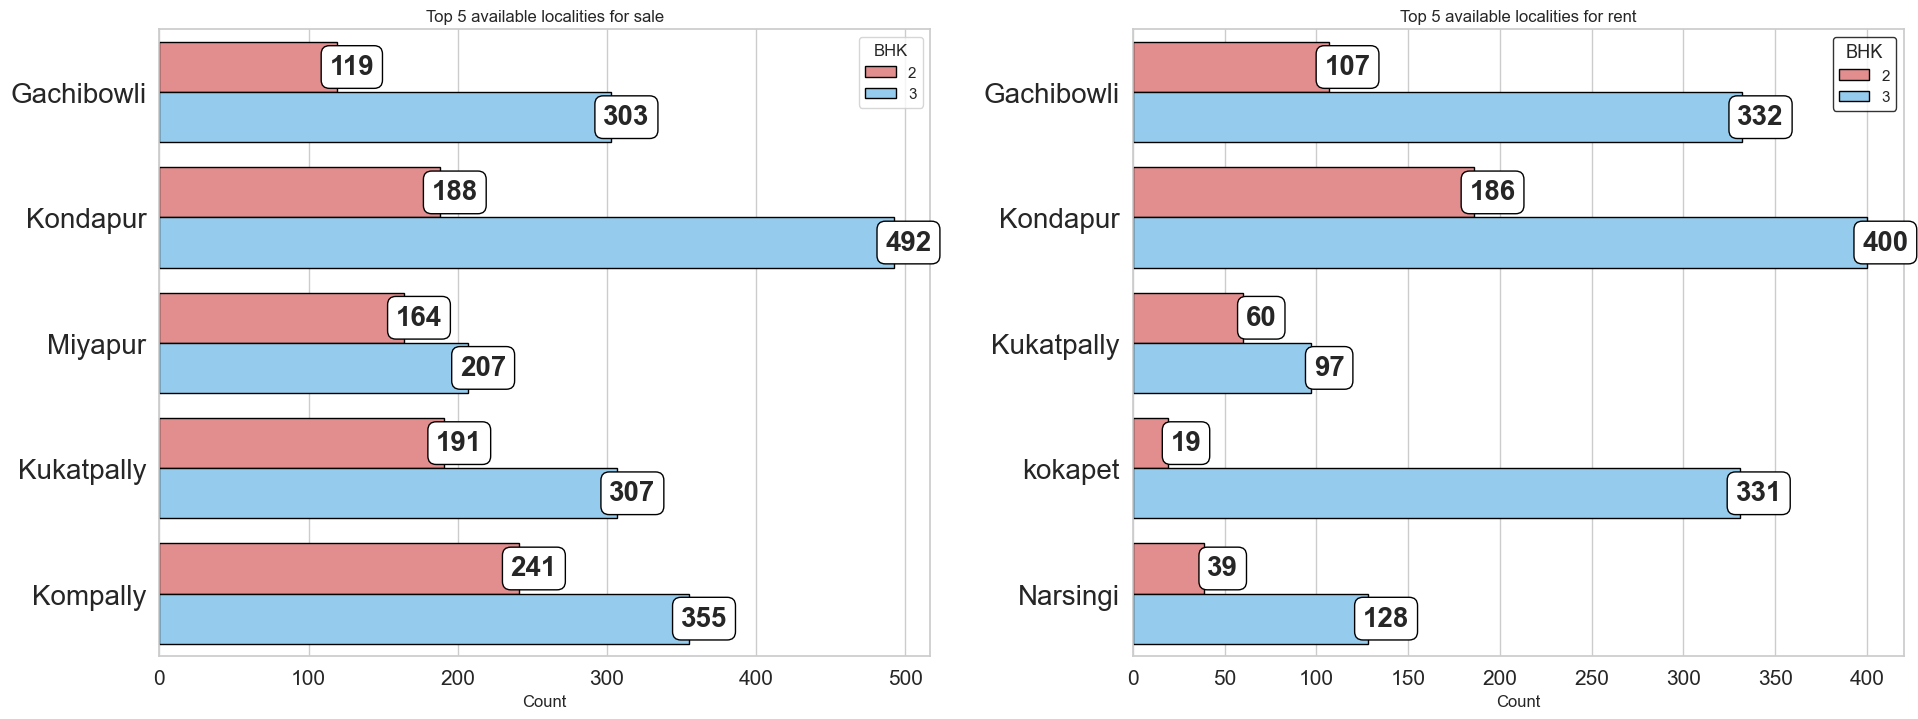

In [30]:
sns.set(style="whitegrid")
colors = {2.0: 'lightcoral', 3.0: 'lightskyblue'}

# Function to add labels
def add_labels(ax):
    for p in ax.patches:
        if p.get_width() > 0:
            ax.text(p.get_width() + 10, p.get_y() + p.get_height() / 2, f"{int(p.get_width())}",
                    ha='center', va='center', fontsize=20, fontweight='bold',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.figure(figsize=(20, 8))
def plot_countplot(data, title, ax):
    sns.countplot(data=data, y='Locality', hue='BHK', edgecolor='black', palette=colors, ax=ax)
    add_labels(ax)
    ax.set(title=title, xlabel='Count', ylabel='')
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=15)

ax1 = plt.subplot(1, 2, 1)
plot_countplot(top_5_availability, 'Top 5 available localities for sale', ax1)

ax2 = plt.subplot(1, 2, 2)
plot_countplot(top_5_rent, 'Top 5 available localities for rent', ax2)

plt.legend(title='BHK', title_fontsize=13, fontsize=11, loc='upper right', fancybox=True, frameon=True, edgecolor='black')
plt.tight_layout(pad=3.0)
plt.savefig('cluster.png')
plt.show()

* Across both sales and rental markets, 3 BHK units dominate the availability, indicating a possible preference for larger homes in these localities.
* Kondapur and Gachibowli consistently rank high in both sales and rentals, making them attractive areas for both buyers and tenants.
* Kompally shows a higher availability for sale, but it doesn’t appear in the top 5 rental localities, suggesting it may be more of a buyer’s market.
* Miyapur and Kukatpally maintain balanced availability, making them suitable for both sales and rentals, with a slight tilt towards larger homes.

In [35]:
df['Transaction'].value_counts()

Transaction
Resale           5848
New Property     2943
Not Mentioned     144
Other              12
Name: count, dtype: int64

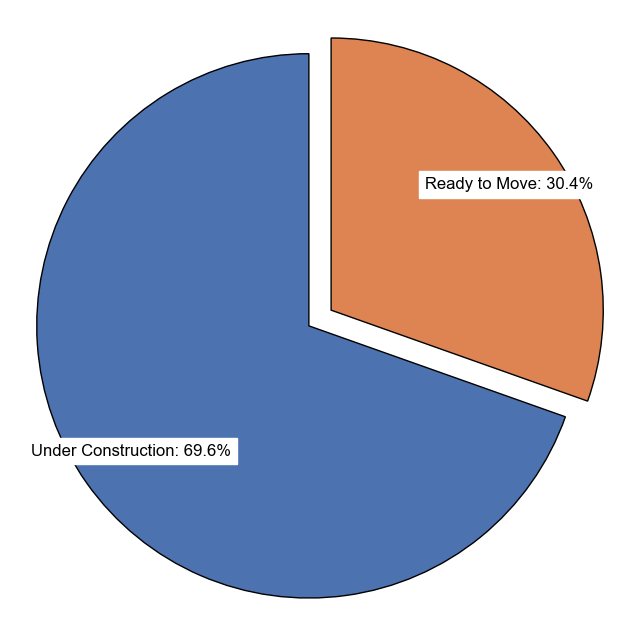

In [55]:
plt.pie(
    status_counts,
    explode=explode,  # Adds space between slices
    labels=None,  # No external labels
    autopct=lambda pct: f'{status_counts.index[int(pct / 100 * len(status_counts))]}: {pct:.1f}%',  # Label and percentage
    textprops={'backgroundcolor': 'white', 'color': 'black', 'fontsize': 12},  # Styling for text
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border and makes slices distinct
    startangle=90,  # Rotate for a better look
    pctdistance=0.8  # Position labels slightly closer to the center
)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')  
plt.show()

* Unfurnished properties dominate the market, accounting for 61.9%. This indicates that buyers or tenants might prefer lower-cost options or have a tendency to furnish homes themselves.
* The market is skewed towards Ready to Move properties, contributing a whopping 69.6%. This implies a strong preference for homes that are immediately available for occupation.
* Resale properties make up 66.5% of the market, reflecting that buyers are more interested in pre-owned homes, possibly due to better pricing or location factors.
* New Properties account for 33.5%, showing a solid demand for newly constructed homes but trailing behind resale transactions.

* Across all three metrics—furnishing, status, and transaction—the data shows a preference for budget-friendly and immediately available options. Buyers seem to favor resale properties and unfurnished homes, likely due to cost considerations.
* The demand for ready-to-move properties also highlights that people prefer avoiding the wait and uncertainty that comes with under-construction homes.

In [61]:
group_sizes = bhk.groupby(['Locality', 'BHK']).size().unstack(fill_value=0)
valid_localities = group_sizes[group_sizes.ge(20).all(axis=1)].index
x = bhk[bhk['Locality'].isin(valid_localities)]

In [62]:
top_expensive = x[x['BHK']==3].groupby('Locality')['Price'].median().nlargest(5).index
top_expensive_df = x[x['Locality'].isin(top_expensive)]
top_expensive_df.loc[top_expensive_df['Locality'] == 'Kukatpally Housing Board Colony', 'Locality'] = 'KPHB Colony'

In [63]:
top_affordable = x[x['BHK']==3].groupby('Locality')['Price'].median().nsmallest(5).index
top_affordable_df = x[x['Locality'].isin(top_affordable)]
top_affordable_df.loc[top_affordable_df['Locality'] == 'Kukatpally Housing Board Colony', 'Locality'] = 'KPHB Colony'

In [64]:
median_price_df = top_expensive_df.groupby(['Locality', 'BHK'])['Price'].median().reset_index()
# Filter top 5 localities
top_5_localities = median_price_df.groupby('Locality')['Price'].median().sort_values(ascending=False).head(5).index
df_top_5 = median_price_df[median_price_df['Locality'].isin(top_5_localities)]

In [65]:
median_affordable_df = top_affordable_df.groupby(['Locality', 'BHK'])['Price'].median().reset_index()

# Filter top 5 localities
top_affordable_localities = median_affordable_df.groupby('Locality')['Price'].median().sort_values(ascending=False).head(5).index
df_affordable_5 = median_affordable_df[median_affordable_df['Locality'].isin(top_affordable_localities)]

In [66]:
b=d[(d['BHK']==2)|(d['BHK']==3)]

In [67]:
group_sizes = b.groupby(['Locality', 'BHK']).size().unstack(fill_value=0)
valid_localities = group_sizes[group_sizes.ge(20).all(axis=1)].index
x = b[b['Locality'].isin(valid_localities)]

top_expensive = x[x['BHK']==3].groupby('Locality')['Price'].median().nlargest(5).index
top_expensive_d = x[x['Locality'].isin(top_expensive)]
top_expensive_d.loc[top_expensive_d['Locality'] == 'Kukatpally Housing Board Colony', 'Locality'] = 'KPHB Colony'
top_affordable = x[x['BHK']==3].groupby('Locality')['Price'].median().nsmallest(5).index
top_affordable_d = x[x['Locality'].isin(top_affordable)]

median_price_d = top_expensive_d.groupby(['Locality', 'BHK'])['Price'].median().reset_index()

# Filter top 5 localities
top_5_localities = median_price_d.groupby('Locality')['Price'].median().sort_values(ascending=False).head(5).index
d_top_5 = median_price_d[median_price_d['Locality'].isin(top_5_localities)]

median_affordable_d = top_affordable_d.groupby(['Locality', 'BHK'])['Price'].median().reset_index()

# Filter top 5 localities
top_affordable_localities = median_affordable_d.groupby('Locality')['Price'].median().sort_values(ascending=False).head(5).index
d_affordable_5 = median_affordable_d[median_affordable_d['Locality'].isin(top_affordable_localities)]

C:\Users\MOHITH\AppData\Local\Temp\ipykernel_28556\2938474890.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


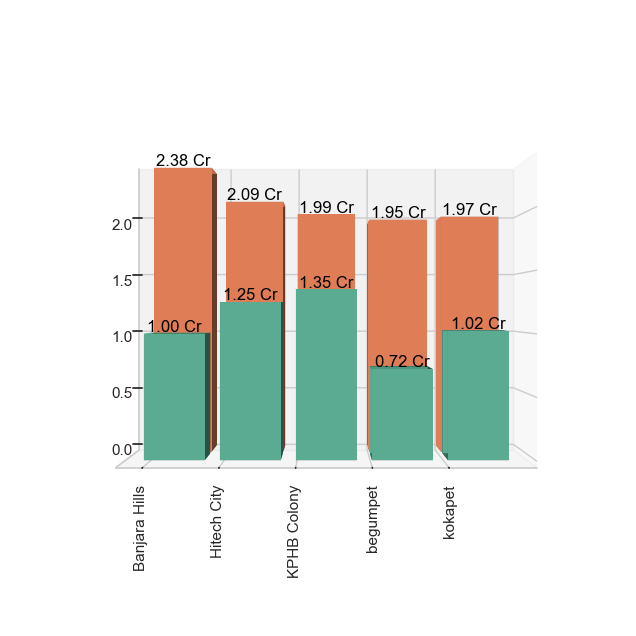

In [69]:
# Assuming df_top_5 is available
median_price_top_5 = df_top_5.groupby(['Locality', 'BHK'])['Price'].median().unstack()

# Set up the 3D plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for locality and BHK
x = np.arange(len(median_price_top_5.index))  # Locality axis
y = np.arange(len(median_price_top_5.columns))  # BHK axis
X, Y = np.meshgrid(x, y)

# Fill Z with median price values
Z = np.zeros_like(X, dtype=float)
for i in range(len(median_price_top_5.index)):
    for j in range(len(median_price_top_5.columns)):
        Z[j, i] = median_price_top_5.iloc[i, j]

# Define two colors for the bars
colors = ['#66c2a5', '#fc8d62']

# Plot 3D bars with two different colors
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(Z.ravel()), 
         0.8, 0.8, Z.ravel(), color=[colors[j % 2] for j in Y.ravel()], edgecolor='none')

# Add text annotations for prices
for i in range(len(median_price_top_5.index)):
    for j in range(len(median_price_top_5.columns)):
        ax.text(X[j, i] + 0.4, Y[j, i], Z[j, i] + 0.05, 
                f"{Z[j, i]:.2f} Cr", ha='center', va='center', size=12, color='black')

# Customize ticks for Locality
ax.set_xticks(np.arange(len(median_price_top_5.index)))
ax.set_xticklabels(median_price_top_5.index, rotation=90)

# Remove BHK axis and labels
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel('')

# Adjust view and layout
ax.view_init(elev=0, azim=270)
plt.tight_layout()
plt.savefig('expsales.png', bbox_inches='tight')
plt.show()

C:\Users\MOHITH\AppData\Local\Temp\ipykernel_22492\4084297133.py:59: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


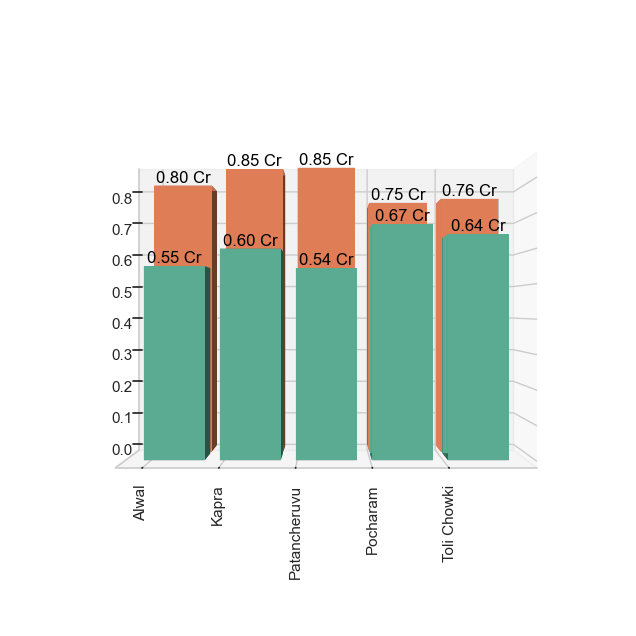

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Group by 'Locality' and 'BHK', and calculate median price
median_price_top_5 = df_affordable_5.groupby(['Locality', 'BHK'])['Price'].median().unstack()
bhk_labels = median_price_top_5.columns

# Create the figure and axis
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D bar plot
x = np.arange(len(median_price_top_5.index))  # Locality axis
y = np.arange(len(median_price_top_5.columns))  # BHK axis
X, Y = np.meshgrid(x, y)

# Create the Z matrix with the same shape as X and Y
Z = np.zeros_like(X, dtype=float)

# Fill Z with values from median_price_top_5
for i in range(len(median_price_top_5.index)):
    for j in range(len(median_price_top_5.columns)):
        Z[j, i] = median_price_top_5.iloc[i, j]  # Switch i and j to align correctly

# Define unique colors for each BHK category
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']  # Adjust colors as needed

# Plot 3D bars with different colors for each BHK, remove edge color
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(Z.ravel()), 
         0.8, 0.8, Z.ravel(), color=[colors[int(bhk)] for bhk in Y.ravel()], edgecolor='none')

# Remove x and z axis labels as requested
ax.set_xlabel('')
ax.set_zlabel('')

# Customize data labels, position them just on top of the bars
for i in range(len(median_price_top_5.index)):
    for j in range(len(median_price_top_5.columns)):
        ax.text(X[j, i] + 0.4, Y[j, i], Z[j, i],  # Position label exactly at the top of the bar
                f"{Z[j, i]:.2f} Cr", 
                ha='center', va='bottom', size=12, color='black', 
                bbox=dict(facecolor='none', edgecolor='none'))  # No background for labels

# Set the yticks to the BHK values
ax.set_yticks([])  # Clear the y-ticks

# Set the xticks to the locality values
ax.set_xticks(np.arange(len(median_price_top_5.index)))
ax.set_xticklabels(median_price_top_5.index)

# Customize the view angle
ax.view_init(elev=0, azim=270)  # Adjust elevation and azimuth angles

# Rotate x-ticks for better readability
plt.xticks(rotation=90)

# Final adjustments to layout
plt.tight_layout()
plt.savefig('affsales.png', bbox_inches='tight')  # Save figure without extra white space
plt.show()


C:\Users\MOHITH\AppData\Local\Temp\ipykernel_22492\1471667792.py:71: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


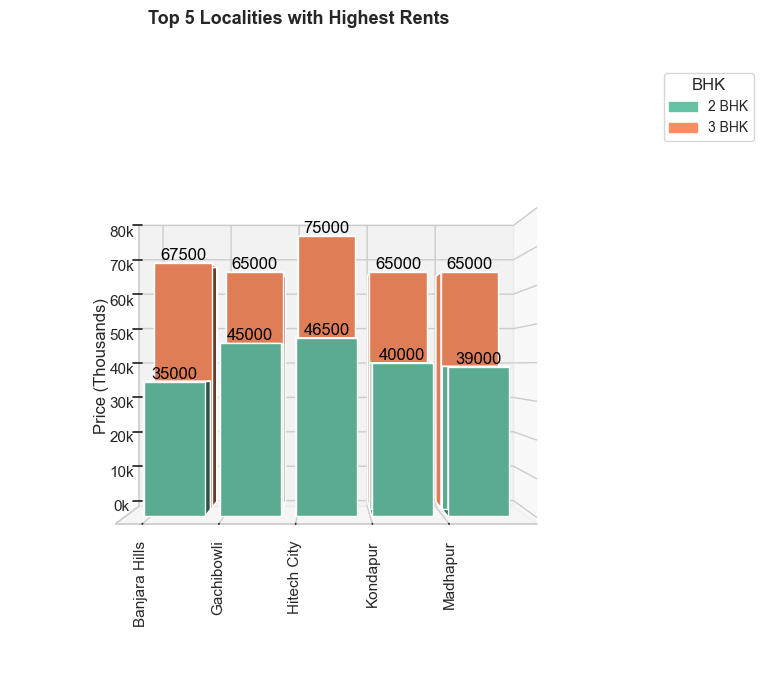

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches  # For creating custom legend

# Group by 'Locality' and 'BHK', and calculate median price
median_price_top_5 = d_top_5.groupby(['Locality', 'BHK'])['Price'].median().unstack()
bhk_labels = median_price_top_5.columns

# Create the figure and axis
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D bar plot
x = np.arange(len(median_price_top_5.index))  # Locality axis
y = np.arange(len(median_price_top_5.columns))  # BHK axis
X, Y = np.meshgrid(x, y)

# Create the Z matrix with the same shape as X and Y
Z = np.zeros_like(X, dtype=float)

# Fill Z with values from median_price_top_5
for i in range(len(median_price_top_5.index)):
    for j in range(len(median_price_top_5.columns)):
        Z[j, i] = median_price_top_5.iloc[i, j]  # Switch i and j to align correctly

# Define unique colors for each BHK category
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']  # Adjust colors as needed

# Plot 3D bars with different colors for each BHK
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(Z.ravel()), 
         0.8, 0.8, Z.ravel(), color=[colors[int(bhk)] for bhk in Y.ravel()])

# Customize the plot title
plt.suptitle('Top 5 Localities with Highest Rents', fontweight='bold', fontsize=13, y=0.95)

# Remove x and y axis labels as requested
ax.set_xlabel('')
ax.set_ylabel('')  # Remove the Y axis label
ax.set_zlabel('Price (Thousands)')  # Optional: Label the Z axis for clarity

# Customize data labels with a larger font and centered alignment
for i in range(len(median_price_top_5.index)):
    for j in range(len(median_price_top_5.columns)):
        ax.text(X[j, i] + 0.4, Y[j, i], Z[j, i] + 0.5,  # Move the label up
                f"{int(Z[j, i])}", 
                ha='center', va='bottom', size=12, color='black')  # Use 'bottom' for vertical alignment

# Set the yticks to the BHK values
ax.set_yticks([])  # Remove the Y axis ticks

# Set the xticks to the locality values
ax.set_xticks(np.arange(len(median_price_top_5.index)))
ax.set_xticklabels(median_price_top_5.index)

# Customize the Z axis ticks to display in thousands
ax.set_zticks(np.arange(0, int(Z.max()) + 10000, 10000))  # Adjust the range as needed
ax.set_zticklabels([f'{int(tick / 1000)}k' for tick in ax.get_zticks()])  # Format ticks in thousands

# Customize the view angle
ax.view_init(elev=0, azim=270)  # Adjust elevation and azimuth angles

# Rotate x-ticks for better readability
plt.xticks(rotation=90)

# Create a custom legend
legend_patches = [mpatches.Patch(color=colors[i], label=f'{bhk_labels[i]} BHK') for i in range(len(bhk_labels))]
ax.legend(handles=legend_patches, title='BHK', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# Final adjustments to layout
plt.tight_layout()
plt.savefig('exprent.png')
plt.show()


C:\Users\MOHITH\AppData\Local\Temp\ipykernel_22492\462064154.py:84: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


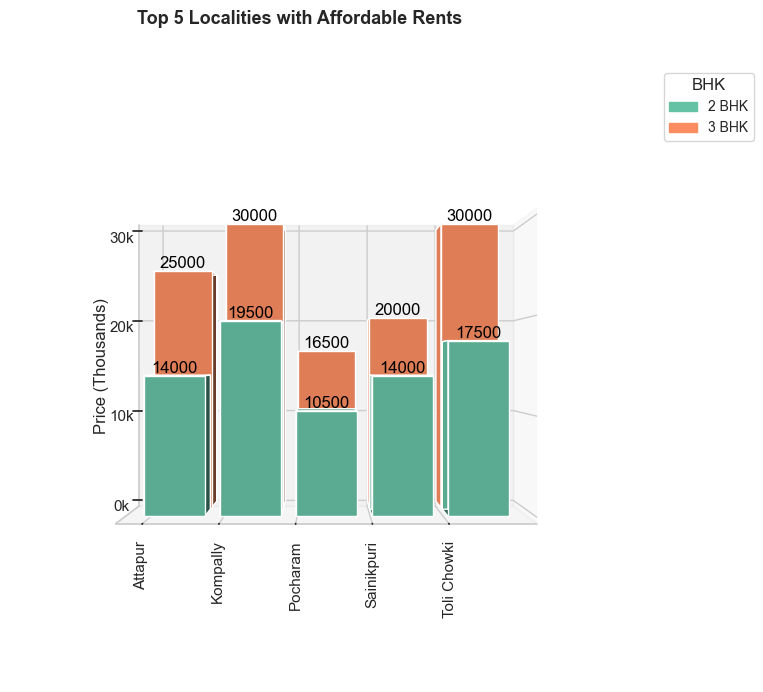

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches  # For creating custom legend
bhk_rent=d[(d['BHK']==2)|(d['BHK']==3)]
# Group sizes and filter valid localities
group_sizes = bhk_rent.groupby(['Locality', 'BHK']).size().unstack(fill_value=0)
valid_localities = group_sizes[group_sizes.ge(10).all(axis=1)].index
x = bhk_rent[bhk_rent['Locality'].isin(valid_localities)]
top_expensive = x[x['BHK'] == 3].groupby('Locality')['Price'].median().nsmallest(5).index
top_expensive_d = x[x['Locality'].isin(top_expensive)]
median_price_d = top_expensive_d.groupby(['Locality', 'BHK'])['Price'].median().reset_index()

# Filter top 5 localities
top_5_localities = median_price_d.groupby('Locality')['Price'].median().sort_values(ascending=False).head(5).index
d_top_5 = median_price_d[median_price_d['Locality'].isin(top_5_localities)]

# Group by 'Locality' and 'BHK', and calculate median price
median_price_top_5 = d_top_5.groupby(['Locality', 'BHK'])['Price'].median().unstack()
bhk_labels = median_price_top_5.columns

# Create the figure and axis
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D bar plot
x = np.arange(len(median_price_top_5.index))  # Locality axis
y = np.arange(len(median_price_top_5.columns))  # BHK axis
X, Y = np.meshgrid(x, y)

# Create the Z matrix with the same shape as X and Y
Z = np.zeros_like(X, dtype=float)

# Fill Z with values from median_price_top_5
for i in range(len(median_price_top_5.index)):
    for j in range(len(median_price_top_5.columns)):
        Z[j, i] = median_price_top_5.iloc[i, j]  # Switch i and j to align correctly

# Define unique colors for each BHK category
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']  # Adjust colors as needed

# Plot 3D bars with different colors for each BHK
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(Z.ravel()), 
         0.8, 0.8, Z.ravel(), color=[colors[int(bhk)] for bhk in Y.ravel()])

# Customize the plot title
plt.suptitle('Top 5 Localities with Affordable Rents', fontweight='bold', fontsize=13, y=0.95)

# Remove x and z axis labels as requested
ax.set_xlabel('')
ax.set_ylabel('')  # Remove the Y axis label
ax.set_zlabel('Price (Thousands)')  # Optional: Label the Z axis for clarity

# Customize data labels with a larger font and centered alignment
for i in range(len(median_price_top_5.index)):
    for j in range(len(median_price_top_5.columns)):
        ax.text(X[j, i] + 0.4, Y[j, i], Z[j, i] + 1.5,  # Move the label up
                f"{int(Z[j, i])}", 
                ha='center', va='bottom', size=12, color='black')  # Use 'bottom' for vertical alignment

# Set the yticks to the BHK values
ax.set_yticks([])  # Remove the Y axis ticks

# Set the xticks to the locality values
ax.set_xticks(np.arange(len(median_price_top_5.index)))
ax.set_xticklabels(median_price_top_5.index)


# Customize the Z axis ticks to display in thousands
ax.set_zticks(np.arange(0, int(Z.max()) + 10000, 10000))  # Adjust the range as needed
ax.set_zticklabels([f'{int(tick / 1000)}k' for tick in ax.get_zticks()])  # Format ticks in thousands

# Customize the view angle
ax.view_init(elev=0, azim=270)  # Adjust elevation for better visualization

# Rotate x-ticks for better readability
plt.xticks(rotation=90)

# Create a custom legend
legend_patches = [mpatches.Patch(color=colors[i], label=f'{bhk_labels[i]} BHK') for i in range(len(bhk_labels))]
ax.legend(handles=legend_patches, title='BHK', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# Final adjustments to layout
plt.tight_layout()
plt.savefig('affrent.png')
plt.show()


### Rent pie-charts

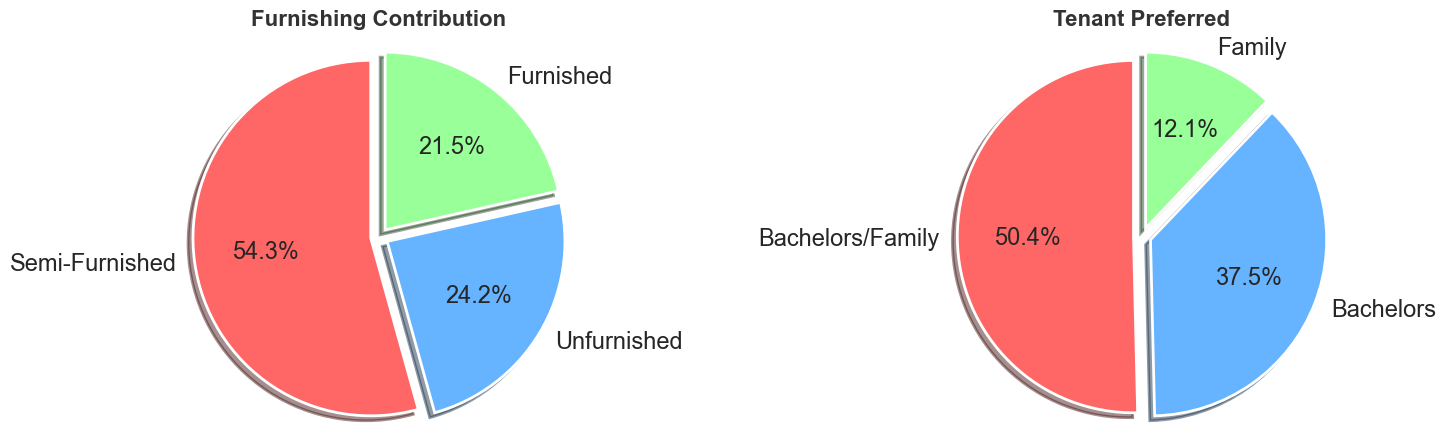

In [91]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Enhanced color palette
colors = ['#ff6666', '#66b3ff', '#99ff99', '#ffcc99']

# Plot 1 - Furnishing Contribution
filtered_df = d[d['Furnishing'] != 'Not Mentioned']
furnishing_contribution = filtered_df['Furnishing'].value_counts()
axs[0].pie(furnishing_contribution, 
           labels=furnishing_contribution.index, 
           autopct='%1.1f%%', 
           startangle=90, 
           colors=colors, 
           wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True},  # White edges
           textprops={'fontsize': 17},   # Increase font size for labels and percentages
           shadow=True, explode=(0.05,) * len(furnishing_contribution))  # Shadow and explode effect
axs[0].set_title('Furnishing Contribution', fontweight='bold', fontsize=16, color='#333333')
axs[0].axis('equal')

# Plot 2 - Tenant Preferred Contribution
x = d[d['Tenant_Preferred'] != 'Not Mentioned']
tenant_preferred_contribution = x['Tenant_Preferred'].value_counts()
axs[1].pie(tenant_preferred_contribution, 
           labels=tenant_preferred_contribution.index, 
           autopct='%1.1f%%', 
           startangle=90, 
           colors=colors, 
           wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True},  # White edges
           textprops={'fontsize': 17},   # Increase font size for labels and percentages
           shadow=True, explode=(0.05,) * len(tenant_preferred_contribution))  # Shadow and explode effect
axs[1].set_title('Tenant Preferred', fontweight='bold', fontsize=16, color='#333333')
axs[1].axis('equal')

# Add borders around each subplot (to the entire pie chart)
for ax in axs:
    ax.patch.set_edgecolor('black')  # Border color
    ax.patch.set_linewidth(2)        # Border thickness

# Adjust layout to maintain proper gaps between subplots
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.3)

# Show the plot
plt.savefig('rentpie.png')
plt.show()


In [92]:
d.columns

Index(['BHK', 'Locality', 'Area', 'Price', 'Floor', 'Carpet_area',
       'Furnishing', 'No_of_bathrooms', 'Tenant_Preferred', 'Availability',
       'Region'],
      dtype='object')

In [70]:
bhk=df[(df['BHK']==2)|(df['BHK']==3)]
group_sizes = bhk.groupby(['Locality', 'BHK']).size().unstack(fill_value=0)

valid_localities = group_sizes[group_sizes.ge(20).all(axis=1)].index

x = bhk[bhk['Locality'].isin(valid_localities)]
df_grouped = x.groupby(['Locality', 'BHK'])['Price'].median().reset_index()


In [71]:
bhk_rent=d[(d['BHK']==2)|(d['BHK']==3)]
group_sizes = bhk_rent.groupby(['Locality', 'BHK']).size().unstack(fill_value=0)

valid_localities = group_sizes[group_sizes.ge(5).all(axis=1)].index

y= bhk_rent[bhk_rent['Locality'].isin(valid_localities)]
df_rent = y.groupby(['Locality', 'BHK'])['Price'].median().reset_index()


In [72]:
len(valid_localities)

38

In [73]:
df_rent.columns=['Locality', 'BHK', 'Rent']

In [88]:
combined = pd.merge(df_grouped,df_rent,how='inner')

In [89]:
combined.head()

,Locality,BHK,Price,Rent
0,Alwal,2,0.5500,13500.0
1,Alwal,3,0.8000,17000.0
2,Ameenpur,2,0.6500,25000.0
3,Ameenpur,3,0.9105,25000.0
4,Bachupally,2,0.6795,25000.0


In [90]:
combined['Price']=combined['Price']*10000000

In [91]:
combined['Price'] = round(combined['Price'],2)

In [92]:
combined['Ratio']=round(combined['Price']/(combined['Rent']*12),2)

In [93]:
combined.to_csv(r"C:\Users\MOHITH\Downloads\combined.csv")

In [94]:
combined.head()

,Locality,BHK,Price,Rent,Ratio
0,Alwal,2,5500000.0,13500.0,33.95
1,Alwal,3,8000000.0,17000.0,39.22
2,Ameenpur,2,6500000.0,25000.0,21.67
3,Ameenpur,3,9105000.0,25000.0,30.35
4,Bachupally,2,6795000.0,25000.0,22.65


In [95]:
combined_2=combined[combined['BHK']==2]

In [96]:
combined_3=combined[combined['BHK']==3]

In [98]:
combined_2.head()

,Locality,BHK,Price,Rent,Ratio
0,Alwal,2,5500000.0,13500.0,33.95
2,Ameenpur,2,6500000.0,25000.0,21.67
4,Bachupally,2,6795000.0,25000.0,22.65
6,Banjara Hills,2,10000000.0,35000.0,23.81
8,Chanda Nagar,2,7200000.0,23000.0,26.09


In [99]:
combined_3.head()

,Locality,BHK,Price,Rent,Ratio
1,Alwal,3,8000000.0,17000.0,39.22
3,Ameenpur,3,9105000.0,25000.0,30.35
5,Bachupally,3,10800000.0,32000.0,28.12
7,Banjara Hills,3,23800000.0,67500.0,29.38
9,Chanda Nagar,3,11600000.0,37500.0,25.78


In [100]:
combined_2[combined_2['Ratio']<=21]

,Locality,BHK,Price,Rent,Ratio
10,Gachibowli,2,11000000.0,45000.0,20.37
28,Madhapur,2,8650000.0,39000.0,18.48
52,kokapet,2,10200000.0,42000.0,20.24


In [101]:
combined_3[combined_3['Ratio']<=21]

,Locality,BHK,Price,Rent,Ratio
25,Kukatpally,3,12000000.0,60000.0,16.67


In [104]:
combined_2.sort_values(by='Ratio').head()

,Locality,BHK,Price,Rent,Ratio
28,Madhapur,2,8650000.0,39000.0,18.48
52,kokapet,2,10200000.0,42000.0,20.24
10,Gachibowli,2,11000000.0,45000.0,20.37
2,Ameenpur,2,6500000.0,25000.0,21.67
14,Hitech City,2,12500000.0,46500.0,22.40


In [105]:
combined_3.sort_values(by='Ratio').head()

,Locality,BHK,Price,Rent,Ratio
25,Kukatpally,3,12000000.0,60000.0,16.67
47,Toli Chowki,3,7600000.0,30000.0,21.11
21,Kondapur,3,18000000.0,65000.0,23.08
15,Hitech City,3,20950000.0,75000.0,23.28
29,Madhapur,3,18500000.0,65000.0,23.72


In [106]:
combined_2.sort_values(by='Ratio',ascending=False).head()

,Locality,BHK,Price,Rent,Ratio
38,Pocharam,2,6685000.0,10500.0,53.06
22,Kothapet,2,5800000.0,12000.0,40.28
32,Nagole,2,7050000.0,14750.0,39.83
12,Hafeezpet,2,10200000.0,22500.0,37.78
48,Uppal,2,6500000.0,15000.0,36.11


In [107]:
combined_3.sort_values(by='Ratio',ascending=False).head()

,Locality,BHK,Price,Rent,Ratio
49,Uppal,3,11000000.0,15000.0,61.11
43,Sainikpuri,3,10500000.0,20000.0,43.75
37,Nizampet,3,11650000.0,23000.0,42.21
1,Alwal,3,8000000.0,17000.0,39.22
39,Pocharam,3,7480000.0,16500.0,37.78


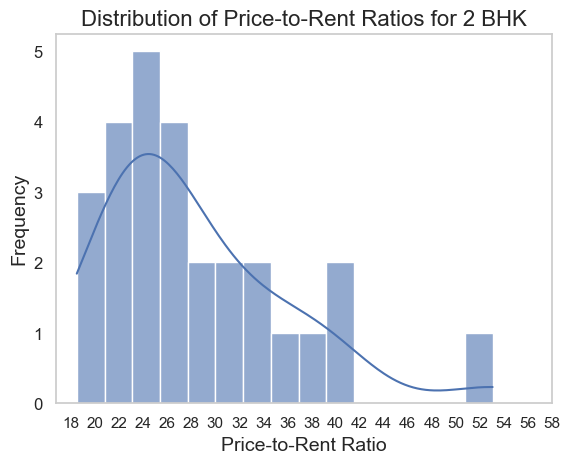

In [132]:
sns.histplot(combined_2['Ratio'], bins=15, kde=True, alpha=0.6)

plt.title('Distribution of Price-to-Rent Ratios for 2 BHK', fontsize=16)
plt.xlabel('Price-to-Rent Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(np.arange(18, 60, 2))
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()


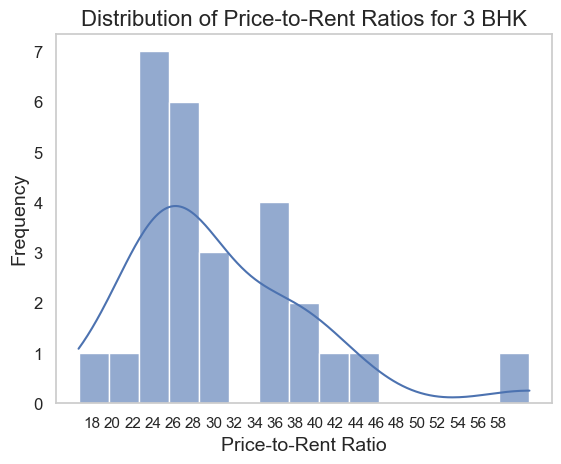

In [133]:
sns.histplot(combined_3['Ratio'], bins=15, kde=True, alpha=0.6)

plt.title('Distribution of Price-to-Rent Ratios for 3 BHK', fontsize=16)
plt.xlabel('Price-to-Rent Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(np.arange(18, 60, 2))
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()


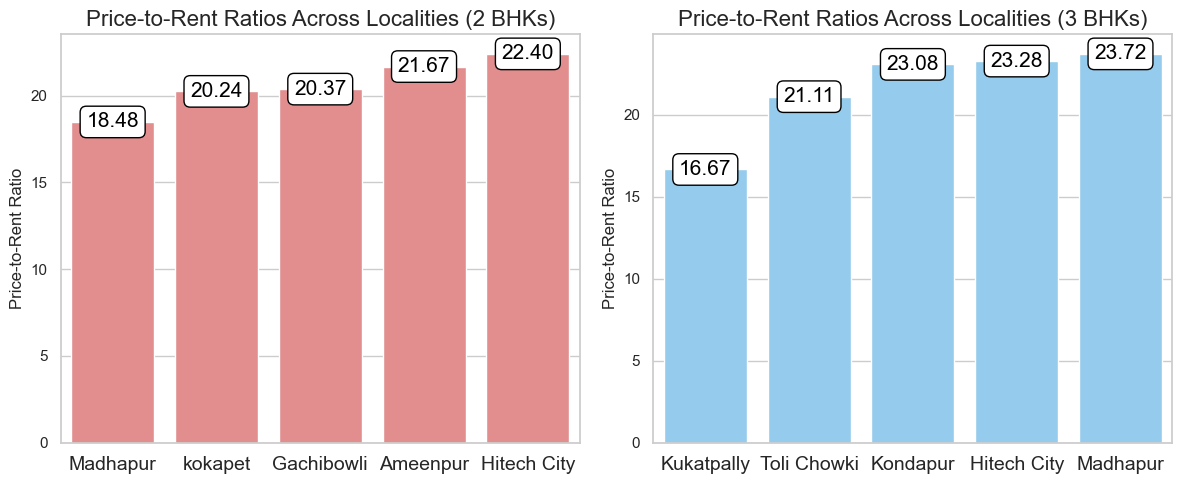

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar(data, subplot_position, title, colour):
    plt.subplot(1, 2, subplot_position)
    ax = sns.barplot(x='Locality', y='Ratio', data=data.sort_values(by='Ratio').head(), color=colour)

    # Adding title and labels
    plt.title(title, fontsize=16)
    plt.ylabel('Price-to-Rent Ratio')

    # Remove x-axis label
    plt.xlabel('')  # Set x-axis label to an empty string

    # Setting x-axis ticks font size
    plt.xticks(fontsize=14)  # Adjust this value for the desired size

    # Annotating the bars with data labels
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=15,
                    color='black',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

# Creating subplots
plt.figure(figsize=(12, 5))
plot_bar(combined_2, 1, 'Price-to-Rent Ratios Across Localities (2 BHKs)', 'lightcoral')
plot_bar(combined_3, 2, 'Price-to-Rent Ratios Across Localities (3 BHKs)', 'lightskyblue')

plt.tight_layout()  # Adjusts subplots to fit into figure area.
plt.show()

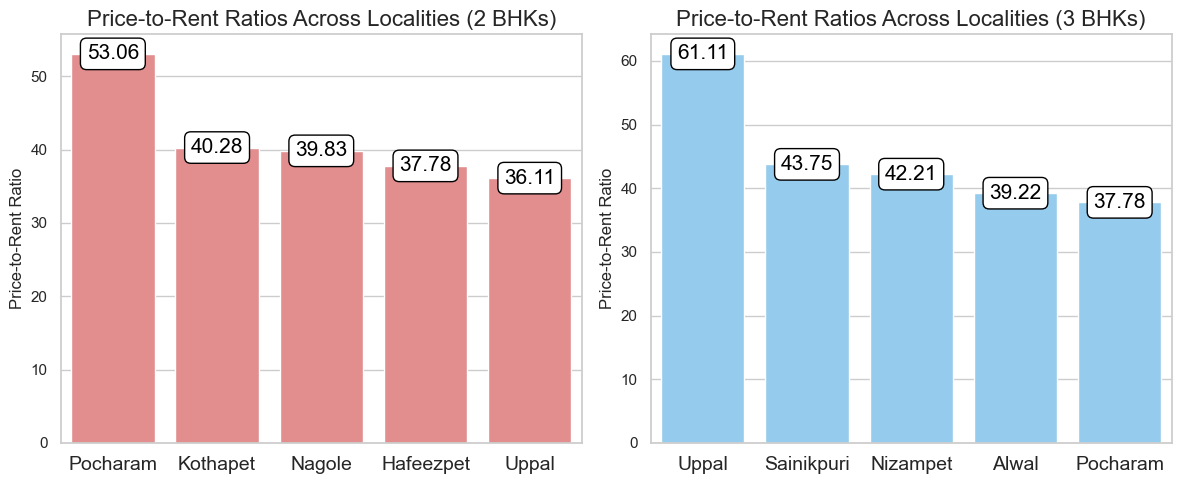

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar(data, subplot_position, title, colour):
    plt.subplot(1, 2, subplot_position)
    ax = sns.barplot(x='Locality', y='Ratio', data=data.sort_values(by='Ratio',ascending=False).head(), color=colour)

    # Adding title and labels
    plt.title(title, fontsize=16)
    plt.ylabel('Price-to-Rent Ratio')

    # Remove x-axis label
    plt.xlabel('')  # Set x-axis label to an empty string

    # Setting x-axis ticks font size
    plt.xticks(fontsize=14)  # Adjust this value for the desired size

    # Annotating the bars with data labels
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=15,
                    color='black',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

# Creating subplots
plt.figure(figsize=(12, 5))
plot_bar(combined_2, 1, 'Price-to-Rent Ratios Across Localities (2 BHKs)', 'lightcoral')
plot_bar(combined_3, 2, 'Price-to-Rent Ratios Across Localities (3 BHKs)', 'lightskyblue')

plt.tight_layout()  # Adjusts subplots to fit into figure area.
plt.show()